In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IS_project/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(df.shape)
print(df.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
print(df['Class'].value_counts(normalize=True))
print(df['Class'].value_counts(normalize=False))

0    0.998273
1    0.001727
Name: Class, dtype: float64
0    284315
1       492
Name: Class, dtype: int64


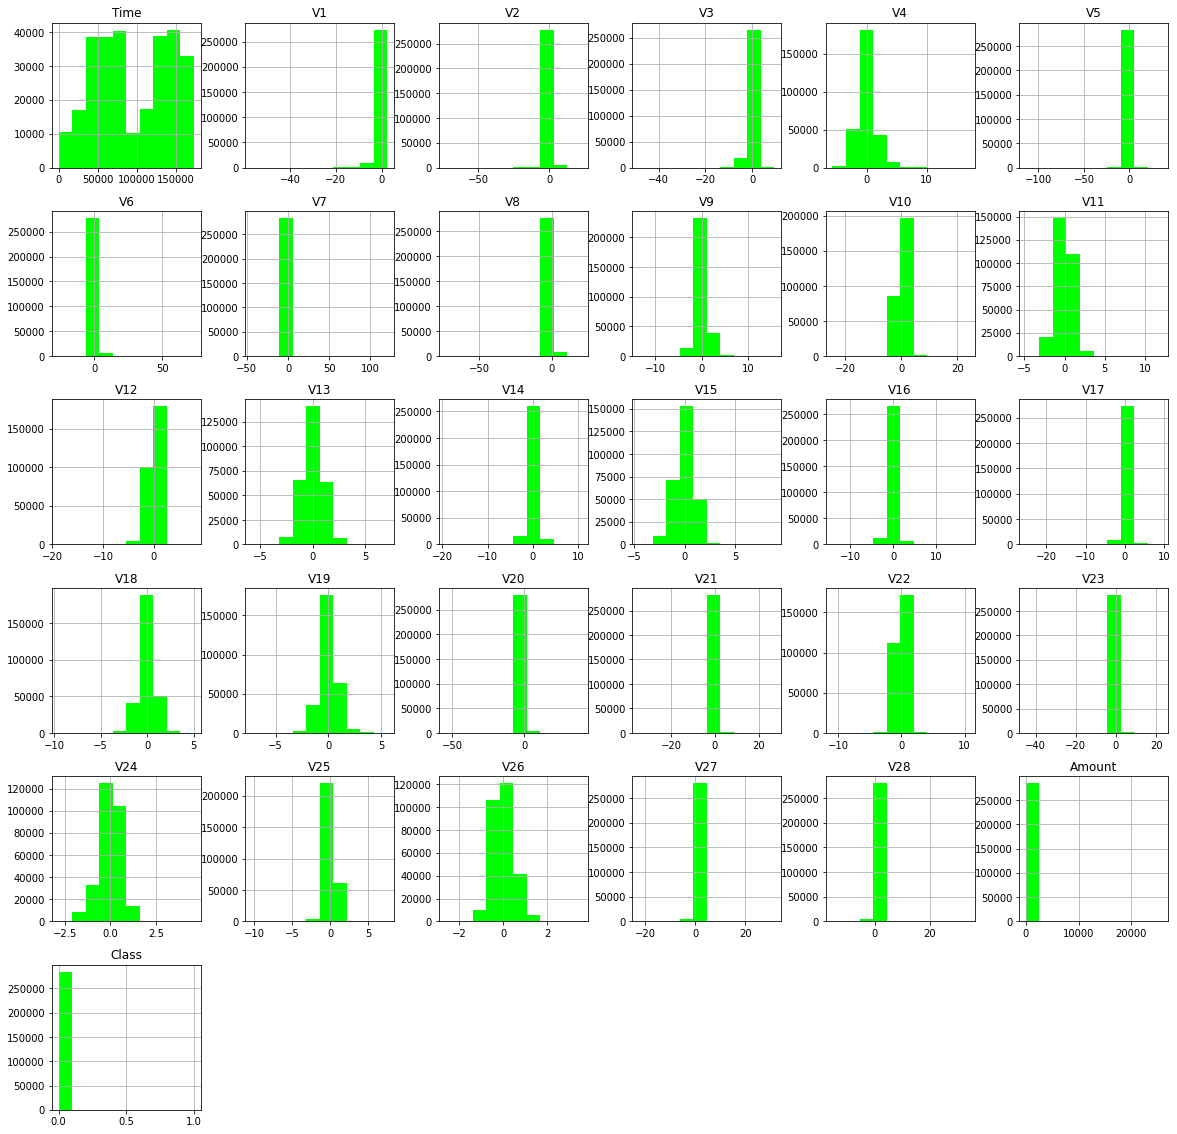

In [ ]:
df.hist(figsize = (20, 20), histtype ='bar', color = 'lime')
plt.show()

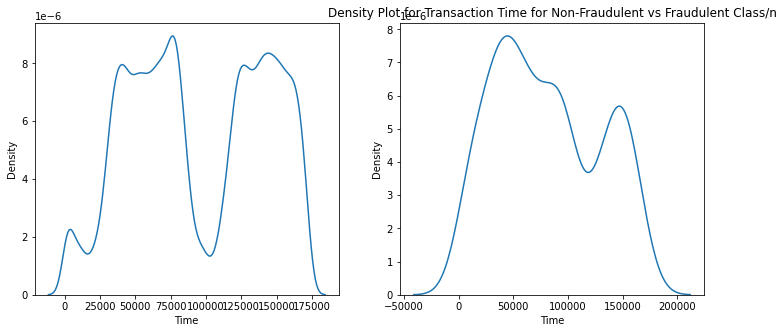

In [ ]:
''' Studying Transactions in Time Using Density Plot to observe its distribution in the dataset. 
    Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, 
    including the low real transaction times, during night in Europe timezone.'''

df_0 = df[df['Class'] == 0]
df_1 = df[df['Class'] == 1]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
plt.title('Density Plot for Transaction Time for Non-Fraudulent vs Fraudulent Class/n')
sns.kdeplot(ax=ax1, x="Time", data=df_0)
sns.kdeplot(ax=ax2, x="Time", data=df_1)
plt.show();

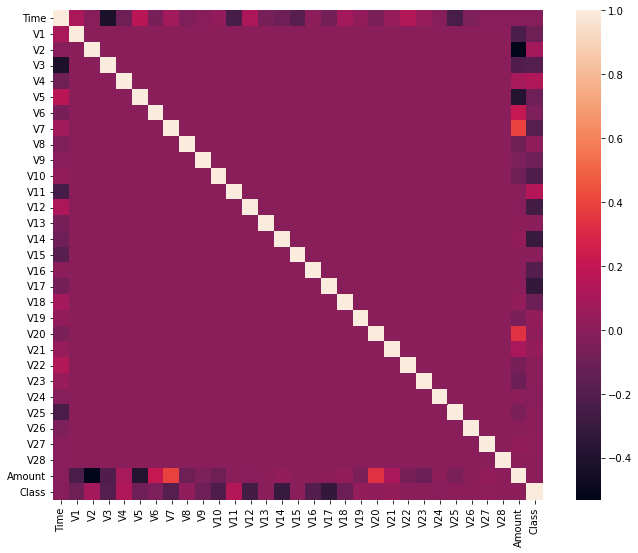

' there is no notable correlation between features V1-V28. There are certain correlations between some of these features and \n    Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).'

In [ ]:
# Correlation matrix
fig = plt.figure(figsize = (12, 9))
sns.heatmap(df.corr(), square = True)
plt.show()

''' there is no notable correlation between features V1-V28. There are certain correlations between some of these features and 
    Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).'''

In [ ]:
# Adding new column hour using Time
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

# Aggregating the amount spent for each class per hour
df_hrs = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_hrs.head()

,Hour,Class,min,max,count,sum,mean,median,var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


In [ ]:
df_hrs.describe()

,Hour,Class,min,max,count,sum,mean,median,var
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.00000,93.000000
mean,23.361702,0.489362,2.998085,3810.084362,3029.861702,267687.127766,105.322347,37.70266,65428.201318
std,14.041299,0.502567,16.212902,4609.849772,3604.751627,342170.475546,72.024138,57.56944,87044.817676
min,0.000000,0.000000,0.000000,7.570000,1.000000,8.770000,2.923333,0.68000,16.353633
25%,11.250000,0.000000,0.000000,539.620000,9.250000,1030.855000,68.348429,12.44000,19722.998459
50%,23.000000,0.000000,0.000000,1908.075000,1093.000000,75051.755000,86.973189,19.91000,45060.783960
75%,35.750000,1.000000,0.605000,5865.455000,7712.250000,616901.745000,113.409189,30.84500,77516.755638
max,47.000000,1.000000,144.620000,25691.160000,9881.000000,961494.920000,397.706250,319.36000,739515.311747


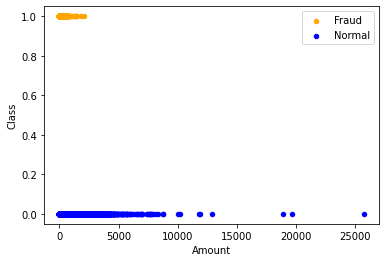

In [ ]:
ax = df_1.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
df_0.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)

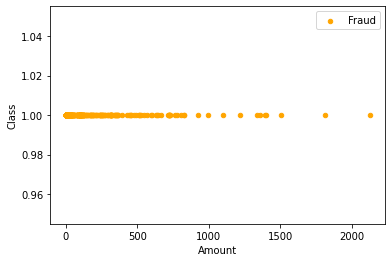

In [ ]:
df_1.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

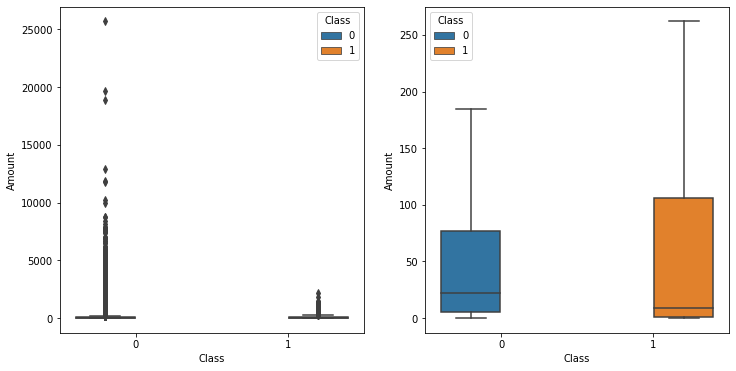

' The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; \n    fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers. '

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=df, showfliers=True)
s = sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=df, showfliers=False)
plt.show();
''' The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; 
    fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers. '''

In [ ]:
X = df.drop(columns='Class', axis=1).values
Y = df['Class'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import time

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
algos = []
roc_score = []
time_taken = []
accuracy = []

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
start = time.time()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print(roc_auc_score(y_test, pred))
algos.append("K-Nearest Neighbors")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

# error_rate = []
# for i in range(2,30):
#   knn = KNeighborsClassifier(n_neighbors=i)
#   knn.fit(x_train, y_train)
#   pred_i = knn.predict(x_test)
#   error_rate.append(np.mean(pred_i != y_test))

# plt.figure(figsize=(10,6))
# plt.plot(range(2,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')
# print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Accuracy Score :  0.9984375548611355
[[56864     0]
 [   89     9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.09      0.17        98

    accuracy                           1.00     56962
   macro avg       1.00      0.55      0.58     56962
weighted avg       1.00      1.00      1.00     56962

0.5459183673469388


Accuracy Score :  0.9991924440855307
[[56836    28]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.82      0.78        98

    accuracy                           1.00     56962
   macro avg       0.87      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962

0.9079170638429823


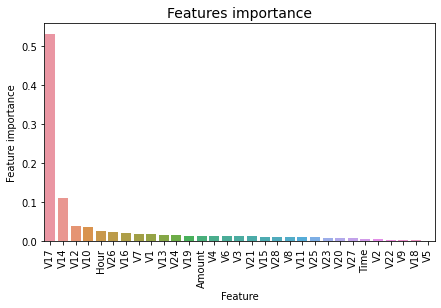

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
start = time.time()
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print(roc_auc_score(y_test, pred))
algos.append("Decision Tree Classifier")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

# features importance
tmp = pd.DataFrame({'Feature': df.drop(columns='Class', axis=1).columns, 'Feature importance': dt.feature_importances_})
tmp.sort_values(by='Feature importance',ascending=False, inplace=True)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

Accuracy Score :  0.9995786664794073
[[56861     3]
 [   21    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score :  0.8928307641289491


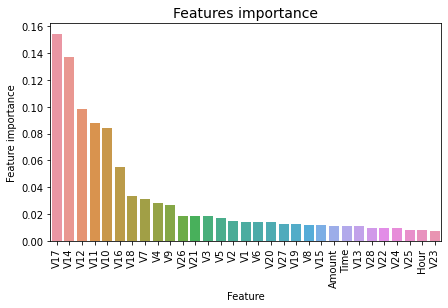

In [ ]:
# Random Forest Classifier 
rf = RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print("ROC AUC Score : ", roc_auc_score(y_test, pred))
algos.append("Random Forest Classifier")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

# features importance
tmp = pd.DataFrame({'Feature': df.drop(columns='Class', axis=1).columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [ ]:
# Logistic Regression
lr = LogisticRegression(solver="liblinear", random_state=0)
start = time.time()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print("ROC AUC Score : ", roc_auc_score(y_test, pred))
algos.append("Logistic Regression")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

Accuracy Score :  0.9989291106351603
[[56845    19]
 [   42    56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.57      0.65        98

    accuracy                           1.00     56962
   macro avg       0.87      0.79      0.82     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score :  0.7855472204357263


Accuracy Score :  0.9993153330290369
[[56852    12]
 [   27    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.72      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score :  0.8621393830464094


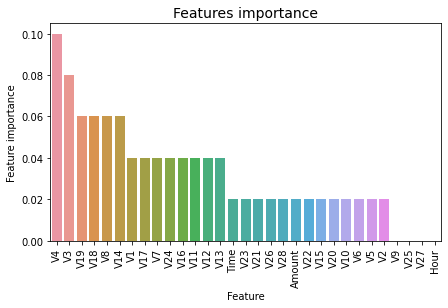

In [ ]:
# AdaBoost Classifer
ab = AdaBoostClassifier()
start = time.time()
ab.fit(x_train, y_train)
pred = ab.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print("ROC AUC Score : ", roc_auc_score(y_test, pred))
algos.append("Adaptive Boosting Classifier")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

# features importance
tmp = pd.DataFrame({'Feature': df.drop(columns='Class', axis=1).columns, 'Feature importance': ab.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

Accuracy Score :  0.9966293318352586
[[56712   152]
 [   40    58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.28      0.59      0.38        98

    accuracy                           1.00     56962
   macro avg       0.64      0.79      0.69     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score :  0.7945818451184639


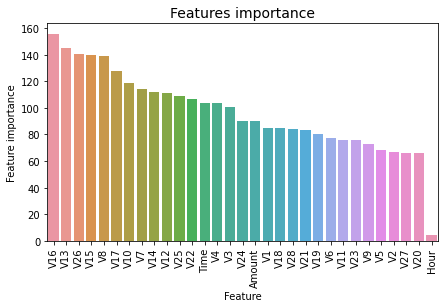

In [ ]:
# Light Gradient Boosting Machine
rf = LGBMClassifier()
start = time.time()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print("ROC AUC Score : ", roc_auc_score(y_test, pred))
algos.append("Light Gradient Boosting Machine")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

# features importance
tmp = pd.DataFrame({'Feature': df.drop(columns='Class', axis=1).columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

Accuracy Score :  0.9995786664794073
[[56858     6]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score :  0.9081105078497353


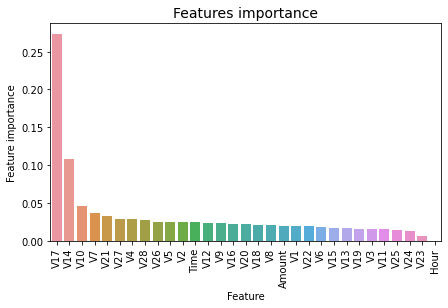

In [ ]:
# Extreme Gradient Boosting
rf = XGBClassifier()
start = time.time()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print("ROC AUC Score : ", roc_auc_score(y_test, pred))
algos.append("Extreme Gradient Boosting")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

# features importance
tmp = pd.DataFrame({'Feature': df.drop(columns='Class', axis=1).columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [ ]:
# for i in range(len(time_taken)):
#     for j in range(i + 1, len(time_taken)):
#         if(roc_score[i] > roc_score[j]):
#             temp = roc_score[i]
#             roc_score[i] = roc_score[j]
#             roc_score[j] = temp
#             temp = algos[i]
#             algos[i] = algos[j]
#             algos[j] = temp
#             temp = time_taken[i]
#             time_taken[i] = time_taken[j]
#             time_taken[j] = temp 

  
# print("Models sorted by roc_auc_score : ")
# for i in range(len(time_taken)):
#   print("MODEL : ", algos[i], "   ROC AUC SCORE : ",roc_score[i], "   TIME TAKEN : ", time_taken[i])

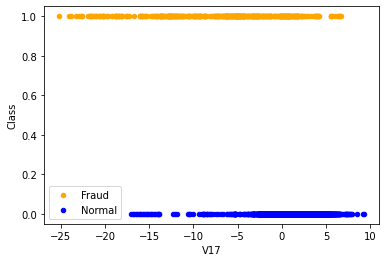

In [ ]:
ax = df_1.plot.scatter(x='V17', y='Class', color='Orange', label='Fraud')
df_0.plot.scatter(x='V17', y='Class', color='Blue', label='Normal', ax=ax)

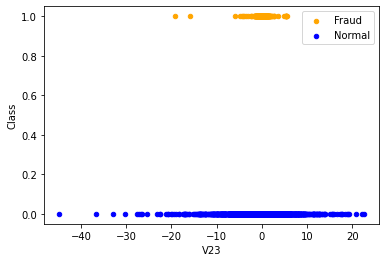

In [ ]:
ax = df_1.plot.scatter(x='V23', y='Class', color='Orange', label='Fraud')
df_0.plot.scatter(x='V23', y='Class', color='Blue', label='Normal', ax=ax)

In [ ]:
final = pd.DataFrame({'MODEL' : algos, 'ROC AUC SCORE' : roc_score, 'ACCURACY' : accuracy, 'TIME TAKEN' : time_taken})
roc = final.sort_values('ROC AUC SCORE', ascending=False)
time = final.sort_values('TIME TAKEN', ascending=False)
acc = final.sort_values('ACCURACY', ascending=False)

In [ ]:
roc

,MODEL,ROC AUC SCORE,ACCURACY,TIME TAKEN
6,Extreme Gradient Boosting,0.908111,0.999579,48.823040
1,Decision Tree Classifier,0.907917,0.999192,17.896131
2,Random Forest Classifier,0.892831,0.999579,182.246800
4,Adaptive Boosting Classifier,0.862139,0.999315,56.300153
5,Light Gradient Boosting Machine,0.794582,0.996629,3.659459
3,Logistic Regression,0.785547,0.998929,2.888219
0,K-Nearest Neighbors,0.545918,0.998438,203.764678


In [ ]:
time

,MODEL,ROC AUC SCORE,ACCURACY,TIME TAKEN
0,K-Nearest Neighbors,0.545918,0.998438,203.764678
2,Random Forest Classifier,0.892831,0.999579,182.246800
4,Adaptive Boosting Classifier,0.862139,0.999315,56.300153
6,Extreme Gradient Boosting,0.908111,0.999579,48.823040
1,Decision Tree Classifier,0.907917,0.999192,17.896131
5,Light Gradient Boosting Machine,0.794582,0.996629,3.659459
3,Logistic Regression,0.785547,0.998929,2.888219


In [ ]:
acc

,MODEL,ROC AUC SCORE,ACCURACY,TIME TAKEN
2,Random Forest Classifier,0.892831,0.999579,182.246800
6,Extreme Gradient Boosting,0.908111,0.999579,48.823040
4,Adaptive Boosting Classifier,0.862139,0.999315,56.300153
1,Decision Tree Classifier,0.907917,0.999192,17.896131
3,Logistic Regression,0.785547,0.998929,2.888219
0,K-Nearest Neighbors,0.545918,0.998438,203.764678
5,Light Gradient Boosting Machine,0.794582,0.996629,3.659459
